# Final Project

## **1.** Practice to use customized module and packages.

#### (1) Generate a folder in your local directory called `package_practice`.

#### (2) In the folder `package_practice`, generate a new folder called `mainpackage`, and then copy the python file `encryption.py` into your folder `mainpackage`.

#### (3) Open the `encryption.py` file with either text editor or other application, to go over and get faimilar with the functions in the file. 

#### (4) Come back to the folder `package_practice`, generate an empty python file called `__init__.py`.

#### (5) Still in the folder `package_practice`, generate a new jupyter notebook file, and do the following tests.

Import the `encryption.py` file as a package in your jupyter notebook

Generate a string called `my_sentence = "hello {your own name}"`

Use the functions `reverse_encryption()` and `reverse_decryption()` to encryption `my_sentence` and then decrypt it back to the original plaintext using the reverse encryption algorithm from the `encryption.py`.

Use the functions `ceasar_encryption()` and `ceasar_decryption()` to encryption the sentence `my_sentence` and then decrypt it back to the original plaintext using the ceasar encryption algorithm from the `encryption.py`.

#### (6) Zip the `package_practice` folder and upload the zip file onto Brightspace.

In [1]:
# write your codes here

## **2.** Practice on Categorical / Numeric Variable Convertion

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
%matplotlib inline

## Import the `Insurance` data as a data frame using Pandas.

Use the `Excel_sample_2` as the data input, with the sheet_name is `Insurance`

Show the head of the data

In [4]:
Insurance_df = pd.read_excel('Excel_sample_2.xlsx', sheet_name = 'Insurance')

In [5]:
Insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Write three functions as follows: 
    
    1. The first function: Given the input of： X, y, and training/testing split ratio, return X_train, X_test, y_train, y_test
    
    2. The second function: Build and trian a linear regression model with the input X_train and y_train. 
    
    In the function, after the model has been trained, print the model parameters with the following format:
    
        2.1 print the `intercept` of the linear regression model.
        
        2.2 print the `coefficient` in the format of a dictionary, such as:
            
            The coefficient is:
            
            age: 100
            sex: 2000
            children: 25
            ......
     
     At last, return the pre-trained linear regression model.
      
     3. The third function: Build a function, given X_test, y_test, and a pre-trained linear regression model as the inputs, output the following items:
     
         calculate prediction results based on the X_test and the pre-trained linear regression model
         
         plot a scatter graph between the prediction results and y_test
         
         print the following evaluation metrics:
         
                 Mean Absolute Error
                 
                 Mean Squared Error
                 
                 Root Mean Squared Error

In [6]:
def data_split(X_input, y_input, split_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size = split_ratio)
    return X_train, X_test, y_train, y_test

In [7]:
def built_linear_model(X_train, y_train):
    lr = LinearRegression()
    model = lr.fit(X_train, y_train)
    coeff_dict = {X_train.columns[i]: lr.coef_[i] for i in range(len(X_train.columns))}
    print(f'The intercept is: {lr.intercept_}')
    print('')
    print(f'The coefficients are:')
    for key, value in coeff_dict.items():    
        print(f'{key} : {value}')
    return model

In [8]:
def evaluate_linear_model(X_test, y_test, lr_input):
    y_predict = lr_input.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, y_predict)
    MSE = metrics.mean_squared_error(y_test, y_predict)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
        
    print(f'The mean absolute error is: {MAE}')
    print('')
    print(f'The mean squared error is: {MSE}')
    print('')
    print(f'The root mean squared error is: {RMSE}')
    print('')
    print(f'The scatter plot of the real Vs predicted charges is shown below:')
    plt.scatter(y_predict, y_test)
    plt.title("Scatter plot of real Vs predicted charges")
    plt.xlabel("Predicted charges (y_predict)")
    plt.ylabel("Real charges (y_test)")
    plt.show()

## Build a linear regression model on numeric variables (i.e., `age, bmi, children`) to predict `charges` with the three functions written before and evalute the model's performance.

In [9]:
X_input = Insurance_df[['age', 'bmi', 'children']]

In [10]:
y_input = Insurance_df['charges']

In [11]:
split_ratio = 0.2

In [12]:
X_train, X_test, y_train, y_test = data_split(X_input, y_input, split_ratio)

In [13]:
lr_input = built_linear_model(X_train, y_train)

The intercept is: -7158.004443577567

The coefficients are:
age : 234.69222472567134
bmi : 337.5992024209678
children : 753.8097236901449


The mean absolute error is: 9536.032298632686

The mean squared error is: 145001648.90688482

The root mean squared error is: 12041.66304572939

The scatter plot of the real Vs predicted charges is shown below:


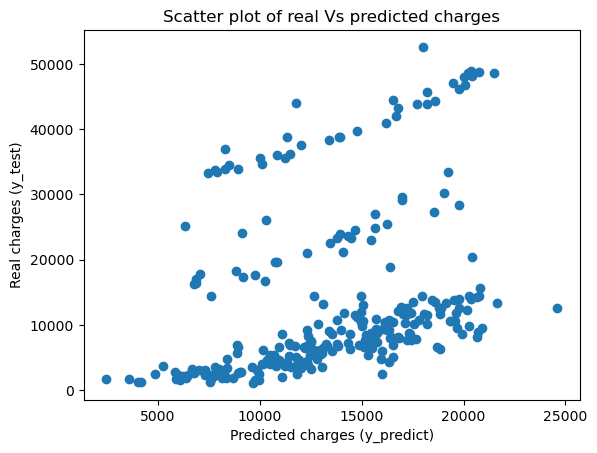

In [14]:
evaluate_linear_model(X_test, y_test, lr_input)

## Build a linear regression model on all variables (i.e., `age, bmi, children, sex, smoker, region`) to predict `charges` with the three functions written before and evalute the model's performance.

1. Convert the categorical varialbes `sex, smoker, region` into numeric variables using `one-hot encoding`.

2. Build a linear model on all the variables (including the numeric variables `age, bmi, children` and the new numeric variables `sex, smoker, region` in the one-hot encoding format).

3. Evaluate the model's performance (including ploting the scatter graph between predictions and real values, and print all the evaluation metrics)

4. Compare this model's performance with previous model's performance. Think about which model's performance is better. And conclude if the categorical variable helps us to do a better prediction or not?

In [15]:
df_sex = pd.get_dummies(Insurance_df['sex'], prefix='sex')

df_region = pd.get_dummies(Insurance_df['region'], prefix='region')

df_smoker = pd.get_dummies(Insurance_df['smoker'], prefix='smoker')

In [16]:
df_ins_new = pd.concat([Insurance_df, df_sex, df_smoker, df_region], axis = 1)

In [17]:
X_input = df_ins_new.drop(['sex', 'smoker', 'region', 'charges'], axis = 1)

In [18]:
y_input = Insurance_df['charges']

In [19]:
X_input.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [20]:
X_train, X_test, y_train, y_test = data_split(X_input, y_input, split_ratio)

In [21]:
X_train.sample()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1205,35,17.86,1,0,1,1,0,0,1,0,0


In [22]:
lr_input = built_linear_model(X_train, y_train)

The intercept is: -1125.9359368138248

The coefficients are:
age : 253.15889052125345
bmi : 358.8760253464367
children : 408.3713639705203
sex_female : 51.8976865666572
sex_male : -51.89768656665842
smoker_no : -11875.115028777196
smoker_yes : 11875.115028777194
region_northeast : 415.06551000315693
region_northwest : 427.5461799914951
region_southeast : -508.3136084594531
region_southwest : -334.29808153519815


The mean absolute error is: 4023.2133415170792

The mean squared error is: 33037981.123297498

The root mean squared error is: 5747.867528335834

The scatter plot of the real Vs predicted charges is shown below:


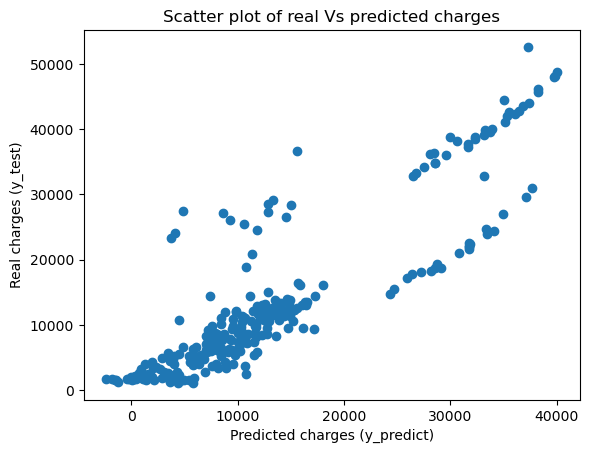

In [23]:
evaluate_linear_model(X_test, y_test, lr_input)

### Write your conclusion here, which model is better?

The second model with the categorical variables is a better model as the evaluated performance shows that its mean absolute, mean squared and root mean squared errors are significantly lower(by almost 50%) than the first model with just the numeric variables. These variance in the errors show us how far away the predicted values are from the actual values and for a model to be considered to have improved, we need the errors to reduce. It is visible in the second model that including the categorical variables into the model has provided more insight thereby making the model more fit for these predictions.

Also the scatterplot in the first model show the disparities between the prdicted and real values as the scale of the y axis and that of the x axis are completely off compared to that of the second model. The second model can still be improved with further analysis and we should expect the evaluated metrices to reduce as well.

# 3. Bonus Question (5 points)

**1**. Read the `Excel_sample_2` excel file using the sheet name = `Phishing URL` as a dataframe.


**2**. Get the basic information of the dataframe, such as the columns, the number of rows/columns, the basic statistical information of the dataframe.


**3**. Feature extraction: 

This is a raw data which can be used for a classification task. The purpose is to detect the type of the URL into different categories, i.e., benign website, phishing website, malware website, and defacement website. You can extract features from the raw data (the `url` column). 

    
**4**. After the features have been extracted, you have transferred your raw data into structured data. 

You can first do some Exploratory Data Analysis (EDA), for instance, to show the joinplot, boxplot, histplot, or heatmap for your dataframe using the visualization methods we talked about in the class.

**5**. Finally, you can build classificaiton algorithm models for website url detection. You can consider using any of the classificaiton algorithms we taught in the class (e.g., logistic regression, decision tree, svm, knn). After the model has been trained, you need to print the evaluation measurement (such as confusion matrix, classification report). 

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
df2 = pd.read_excel('Excel_sample_2.xlsx', sheet_name= 'Phishing_URL')

In [26]:
df2.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [27]:
df2['type'].value_counts()

benign        1903
defacement     477
phishing       135
malware         69
Name: type, dtype: int64

In [28]:
df2['length'] = ''
df2['length'] = df2['url'].apply(lambda x: len(x))

In [29]:
df2.head()

,url,type,length
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235


In [30]:
# write your codes here
phish_df = pd.read_excel('Excel_sample_2.xlsx', sheet_name= 'Phishing_URL')

In [31]:
phish_df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [32]:
phish_df.columns

Index(['url', 'type'], dtype='object')

In [33]:
phish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     2584 non-null   object
 1   type    2584 non-null   object
dtypes: object(2)
memory usage: 40.5+ KB


In [34]:
#show the number of rows and columns
phish_df.shape

(2584, 2)

In [35]:
rows = phish_df.shape[0]
columns = phish_df.shape[1]
print(f'There are {columns} columns and {rows} rows')

There are 2 columns and 2584 rows


In [36]:
phish_df.describe()

,url,type
count,2584,2584
unique,2580,4
top,http://portal.dddgaming.com/docs/rules/15022/c...,benign
freq,2,1903


In [37]:
phish_df.groupby('type').count()

,url
type,
benign,1903
defacement,477
malware,69
phishing,135


In [38]:
phish_df['Alpha#_count'] = phish_df['url'].apply(lambda x: sum(url.isalnum() for url in x))
phish_df['Total_#'] = phish_df['url'].apply(lambda x: sum(url.isdigit() for url in x))
phish_df['Symbol'] = phish_df['url'].apply(lambda x: sum(not url.isalnum() for url in x))
phish_df['url_len'] = phish_df['url'].apply(lambda x: len(x))
phish_df['Http?'] = phish_df['url'].str.startswith('http').astype(int)
phish_df['Dot_com'] = phish_df['url'].apply(lambda x: '.com' in x).astype(int)
phish_df['Slash'] = phish_df['url'].apply(lambda x: x.count('/'))
phish_df['Dash'] = phish_df['url'].apply(lambda x: x.count('-'))
phish_df['Video?'] = phish_df['url'].apply(lambda x: 'video' in x).astype(int)
phish_df['%_sign'] = phish_df['url'].apply(lambda x: '%' in x).astype(int)
phish_df['@_sign'] = phish_df['url'].apply(lambda x: '@' in x).astype(int)

In [39]:
phish_df.head()

,url,type,Alpha#_count,Total_#,Symbol,url_len,Http?,Dot_com,Slash,Dash,Video?,%_sign,@_sign
0,br-icloud.com.br,phishing,13,0,3,16,0,1,0,1,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,30,1,5,35,0,1,2,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,26,1,5,31,0,0,3,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,70,7,18,88,1,0,3,1,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,221,22,14,235,1,0,3,1,0,0,0


In [40]:
phish_df['type_class'] = phish_df['type'].replace(['phishing', 'benign', 'defacement', 'malware'], [0, 1, 2, 3])

In [41]:
phish_df.head()

,url,type,Alpha#_count,Total_#,Symbol,url_len,Http?,Dot_com,Slash,Dash,Video?,%_sign,@_sign,type_class
0,br-icloud.com.br,phishing,13,0,3,16,0,1,0,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,30,1,5,35,0,1,2,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,26,1,5,31,0,0,3,0,0,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,70,7,18,88,1,0,3,1,0,0,0,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,221,22,14,235,1,0,3,1,0,0,0,2


In [42]:
columns = phish_df.columns
columns

Index(['url', 'type', 'Alpha#_count', 'Total_#', 'Symbol', 'url_len', 'Http?',
       'Dot_com', 'Slash', 'Dash', 'Video?', '%_sign', '@_sign', 'type_class'],
      dtype='object')

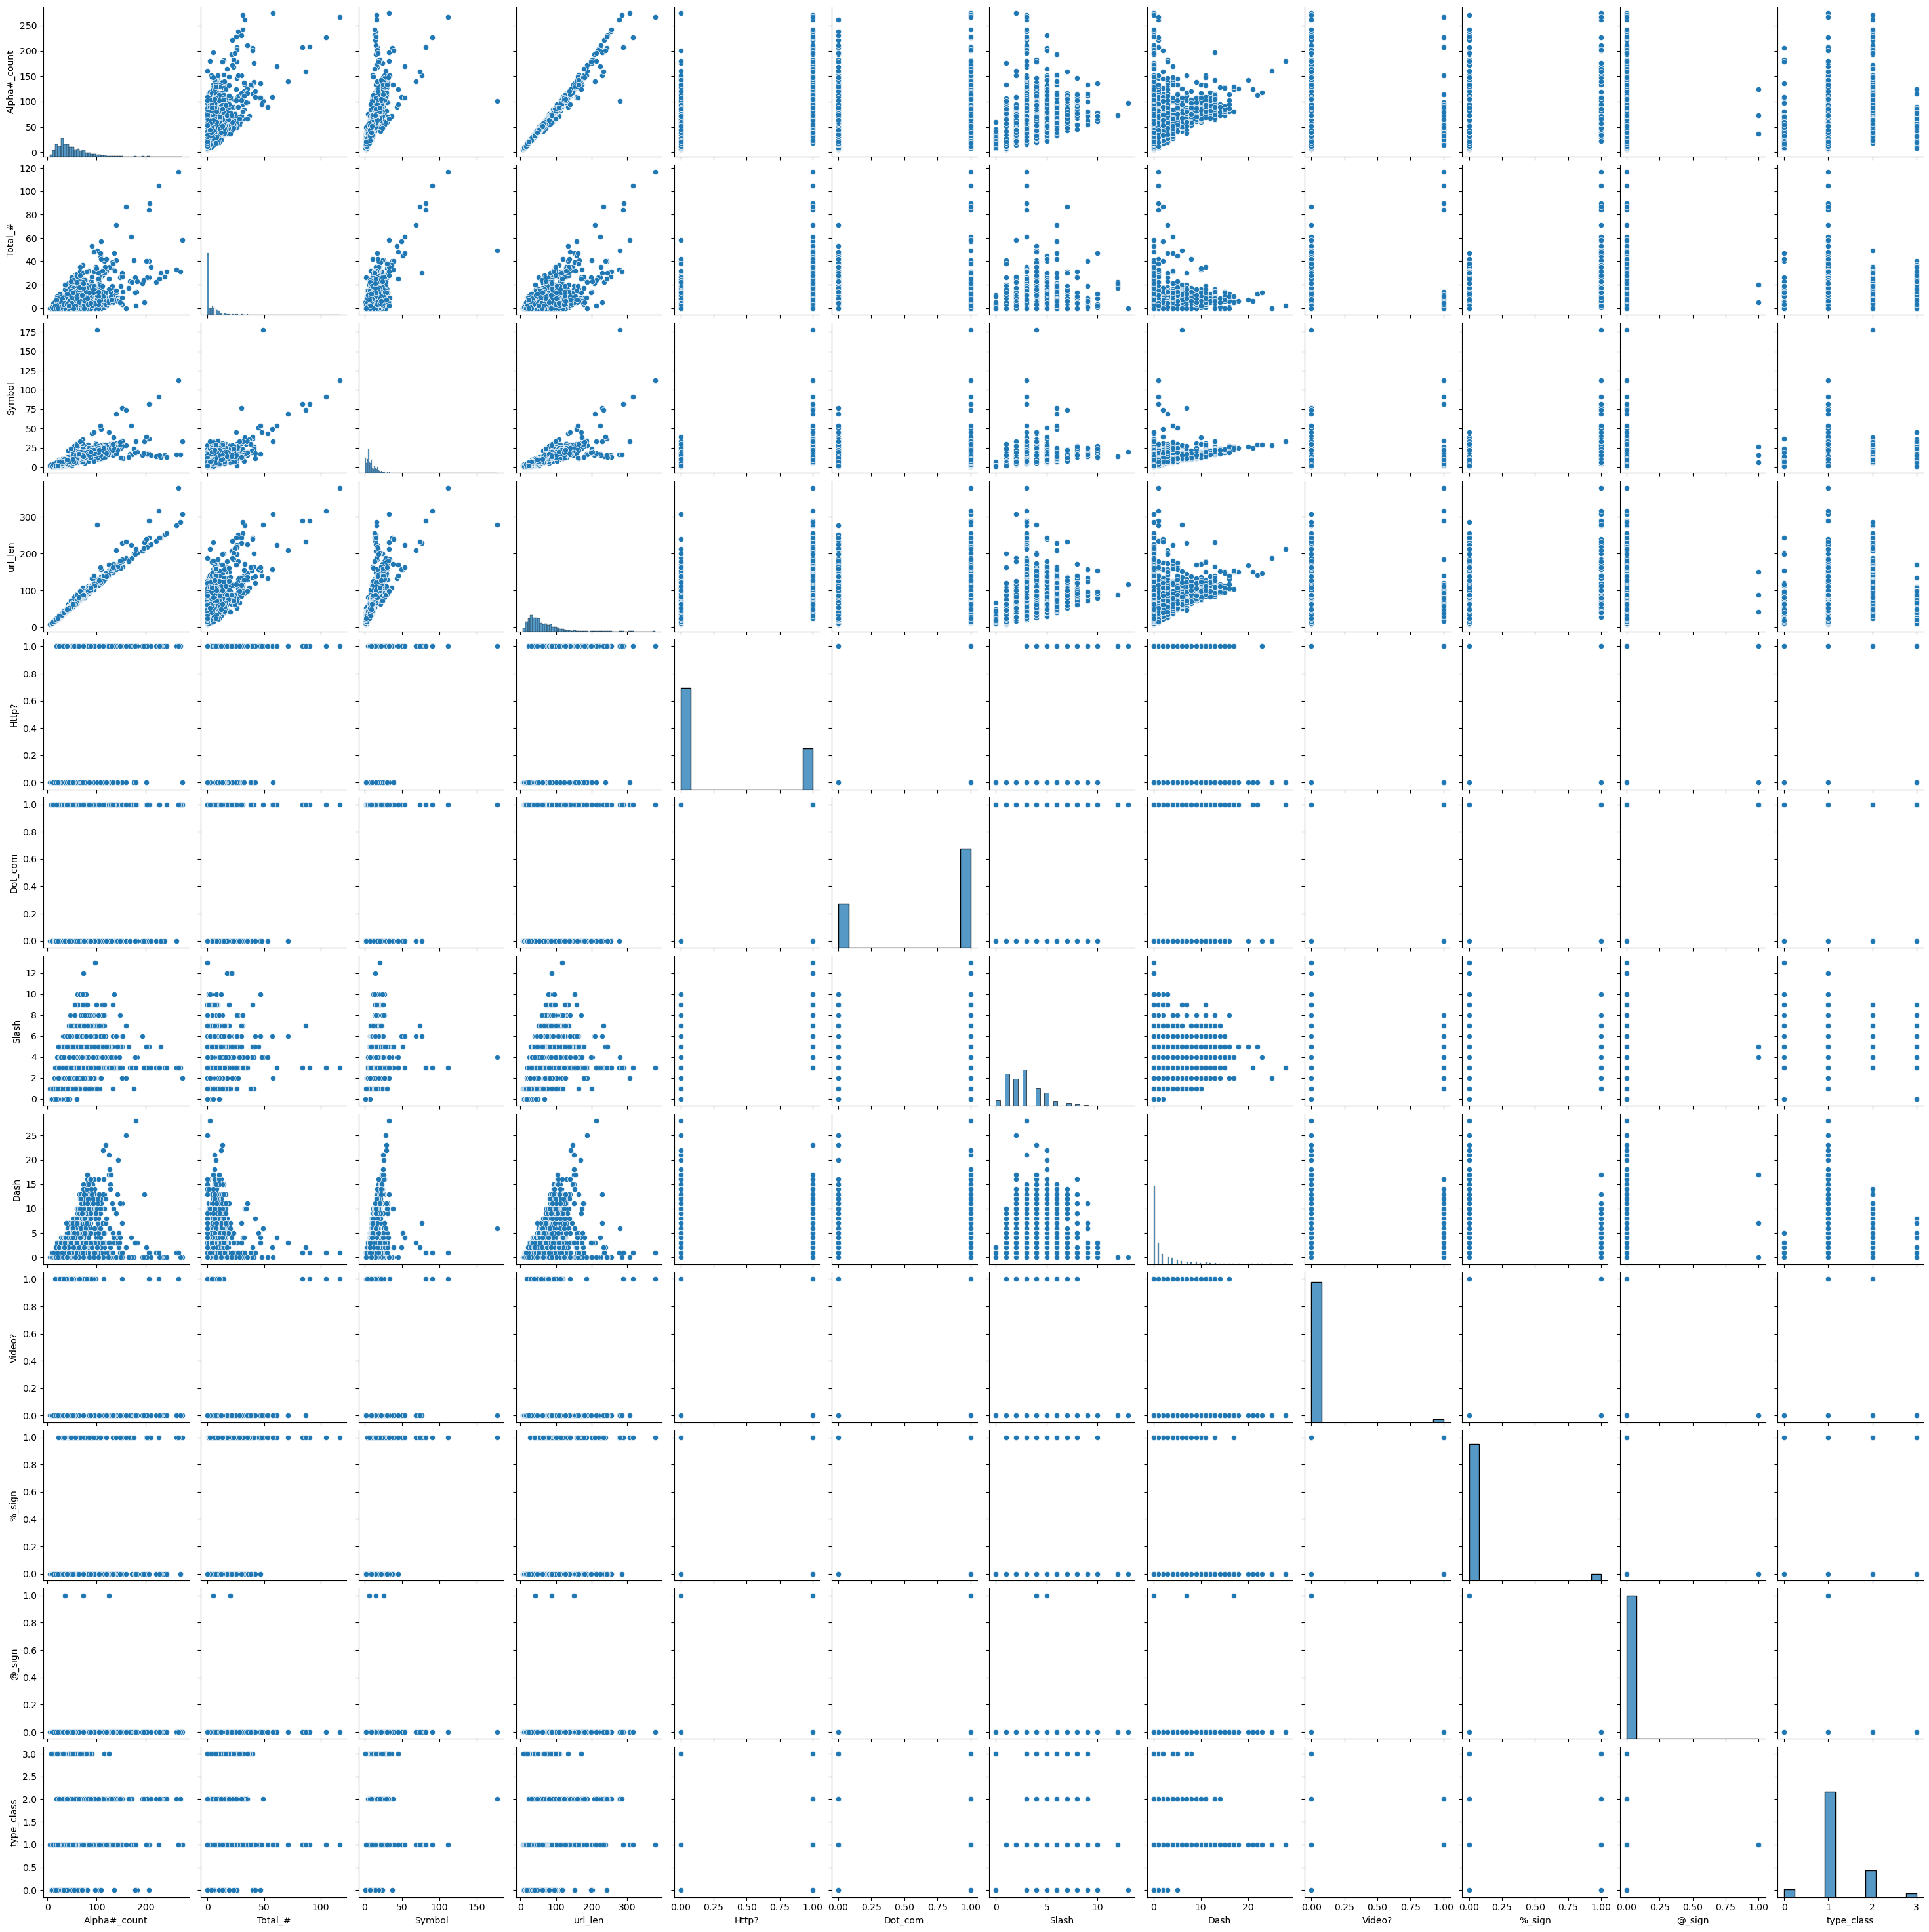

In [43]:
sb.pairplot(phish_df)

/var/folders/9t/p6ldbrld6yl8_v4rty2r5_zh0000gn/T/ipykernel_75917/4087178251.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(phish_df.corr(), cmap = 'coolwarm', annot = True)


<Axes: >

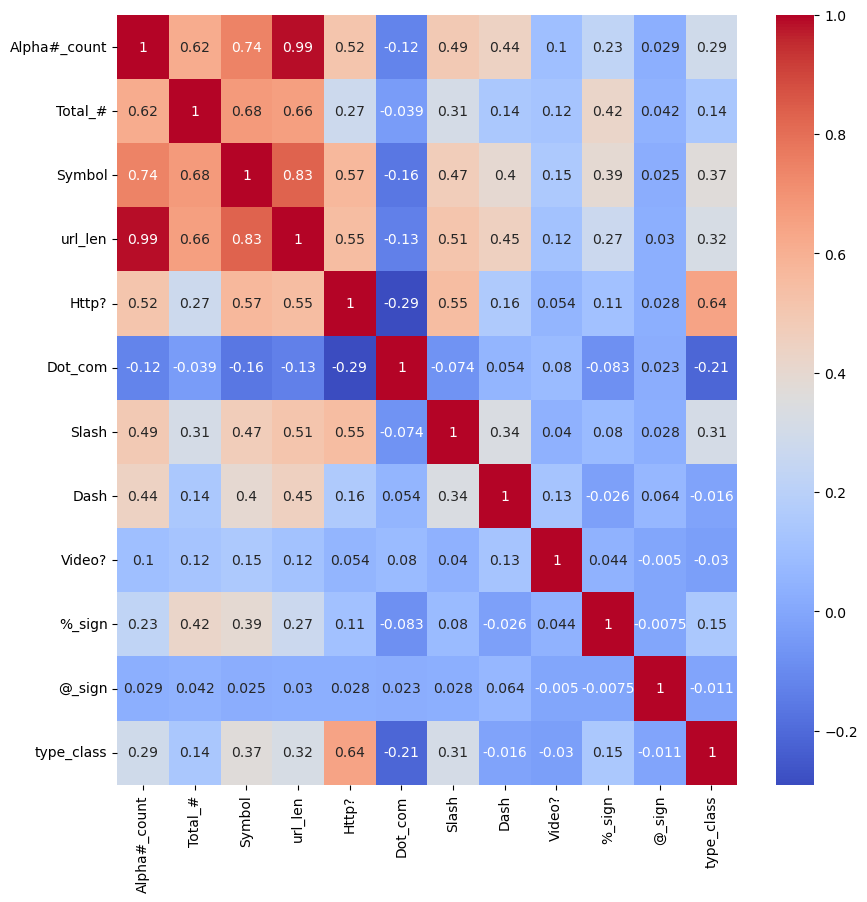

In [44]:
plt.figure(figsize=(10,10))
sb.heatmap(phish_df.corr(), cmap = 'coolwarm', annot = True)

In [45]:
X = phish_df.drop(['url', 'type', 'type_class'], axis=1)

In [46]:
X.sample()

,Alpha#_count,Total_#,Symbol,url_len,Http?,Dot_com,Slash,Dash,Video?,%_sign,@_sign
2477,15,0,3,18,0,1,1,1,0,0,0


In [47]:
y = phish_df['type']

In [48]:
y.head()

0      phishing
1        benign
2        benign
3    defacement
4    defacement
Name: type, dtype: object

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [50]:
log_mod = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

In [51]:
log_mod.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [52]:
y_log_pred = log_mod.predict(X_test)

In [53]:
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

      benign       0.94      0.98      0.96       372
  defacement       0.85      0.92      0.89       106
     malware       0.67      0.43      0.52        14
    phishing       0.57      0.16      0.25        25

    accuracy                           0.91       517
   macro avg       0.76      0.62      0.65       517
weighted avg       0.90      0.91      0.90       517



In [54]:
confusion_matrix(y_test, y_log_pred)

array([[363,   6,   2,   1],
       [  6,  98,   1,   1],
       [  3,   4,   6,   1],
       [ 14,   7,   0,   4]])

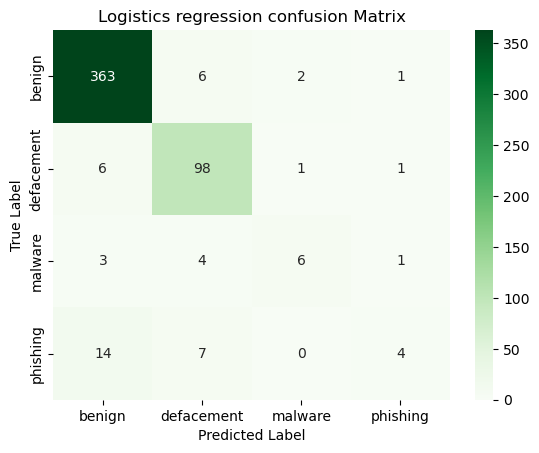

In [55]:
sb.heatmap(confusion_matrix(y_test, y_log_pred), annot = True, fmt = 'd', cmap = 'Greens', xticklabels = log_mod.classes_, yticklabels = log_mod.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistics regression confusion Matrix')
plt.show()

In [56]:
knn_mod = KNeighborsClassifier(n_neighbors = 7)

In [57]:
knn_mod.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [58]:
y_knn_pred = knn_mod.predict(X_test)

In [59]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

      benign       0.89      0.95      0.92       372
  defacement       0.72      0.71      0.71       106
     malware       0.71      0.36      0.48        14
    phishing       0.91      0.40      0.56        25

    accuracy                           0.86       517
   macro avg       0.81      0.60      0.67       517
weighted avg       0.85      0.86      0.85       517



In [60]:
confusion_matrix(y_test, y_knn_pred)

array([[353,  18,   1,   0],
       [ 30,  75,   1,   0],
       [  4,   4,   5,   1],
       [  8,   7,   0,  10]])

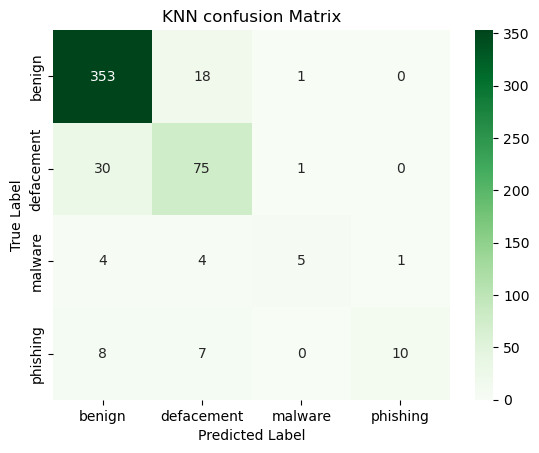

In [61]:
sb.heatmap(confusion_matrix(y_test, y_knn_pred), annot=True, fmt='d', cmap='Greens', xticklabels = knn_mod.classes_, yticklabels = knn_mod.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN confusion Matrix')
plt.show()

In [62]:
svc_mod = SVC()

In [63]:
svc_mod.fit(X_train, y_train)

SVC()

In [64]:
y_svc_pred = svc_mod.predict(X_test)

In [65]:
print(classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

      benign       0.79      0.98      0.88       372
  defacement       0.80      0.38      0.51       106
     malware       1.00      0.36      0.53        14
    phishing       0.00      0.00      0.00        25

    accuracy                           0.79       517
   macro avg       0.65      0.43      0.48       517
weighted avg       0.76      0.79      0.75       517



/Users/chiamakaogugua/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chiamakaogugua/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chiamakaogugua/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
print(classification_report(y_test, y_svc_pred, zero_division=1))

              precision    recall  f1-score   support

      benign       0.79      0.98      0.88       372
  defacement       0.80      0.38      0.51       106
     malware       1.00      0.36      0.53        14
    phishing       1.00      0.00      0.00        25

    accuracy                           0.79       517
   macro avg       0.90      0.43      0.48       517
weighted avg       0.81      0.79      0.75       517



In [67]:
confusion_matrix(y_test, y_svc_pred)

array([[365,   7,   0,   0],
       [ 66,  40,   0,   0],
       [  9,   0,   5,   0],
       [ 22,   3,   0,   0]])

In [68]:
dt_mod = tree.DecisionTreeClassifier()

In [69]:
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_dt_pred = dt_mod.predict(X_test)

In [71]:
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98       372
  defacement       0.88      0.87      0.87       106
     malware       0.56      0.64      0.60        14
    phishing       0.82      0.72      0.77        25

    accuracy                           0.93       517
   macro avg       0.81      0.80      0.80       517
weighted avg       0.93      0.93      0.93       517



In [72]:
confusion_matrix(y_test, y_dt_pred)

array([[364,   4,   4,   0],
       [  9,  92,   2,   3],
       [  1,   3,   9,   1],
       [  0,   6,   1,  18]])

In [73]:
tree_explanation = tree.export_text(dt_mod)

In [74]:
print(tree_explanation)

|--- feature_4 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_3 <= 10.00
|   |   |   |--- class: malware
|   |   |--- feature_3 >  10.00
|   |   |   |--- feature_1 <= 3.50
|   |   |   |   |--- feature_0 <= 32.00
|   |   |   |   |   |--- feature_3 <= 20.50
|   |   |   |   |   |   |--- feature_0 <= 18.50
|   |   |   |   |   |   |   |--- feature_0 <= 17.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 12.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 13.50
|   |   |   |   |   |   |   |   |   |   |--- class: phishing
|   |   |   |   |   |   |   |   |   |--- feature_3 >  13.50
|   |   |   |   |   |   |   |   |   |   |--- class: malware
|   |   |   |   |   |   |   |   |--- feature_0 >  12.50
|   |   |   |   |   |   |   |   |   |--- class: phishing
|   |   |   |   |   |   |   |--- feature_0 >  17.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: phishin

In [75]:
tree_feature = X.columns.values.tolist()

In [76]:
tree_feature

['Alpha#_count',
 'Total_#',
 'Symbol',
 'url_len',
 'Http?',
 'Dot_com',
 'Slash',
 'Dash',
 'Video?',
 '%_sign',
 '@_sign']

In [77]:
tree_class_name = phish_df['type'].unique().tolist()

In [78]:
tree_class_name

['phishing', 'benign', 'defacement', 'malware']

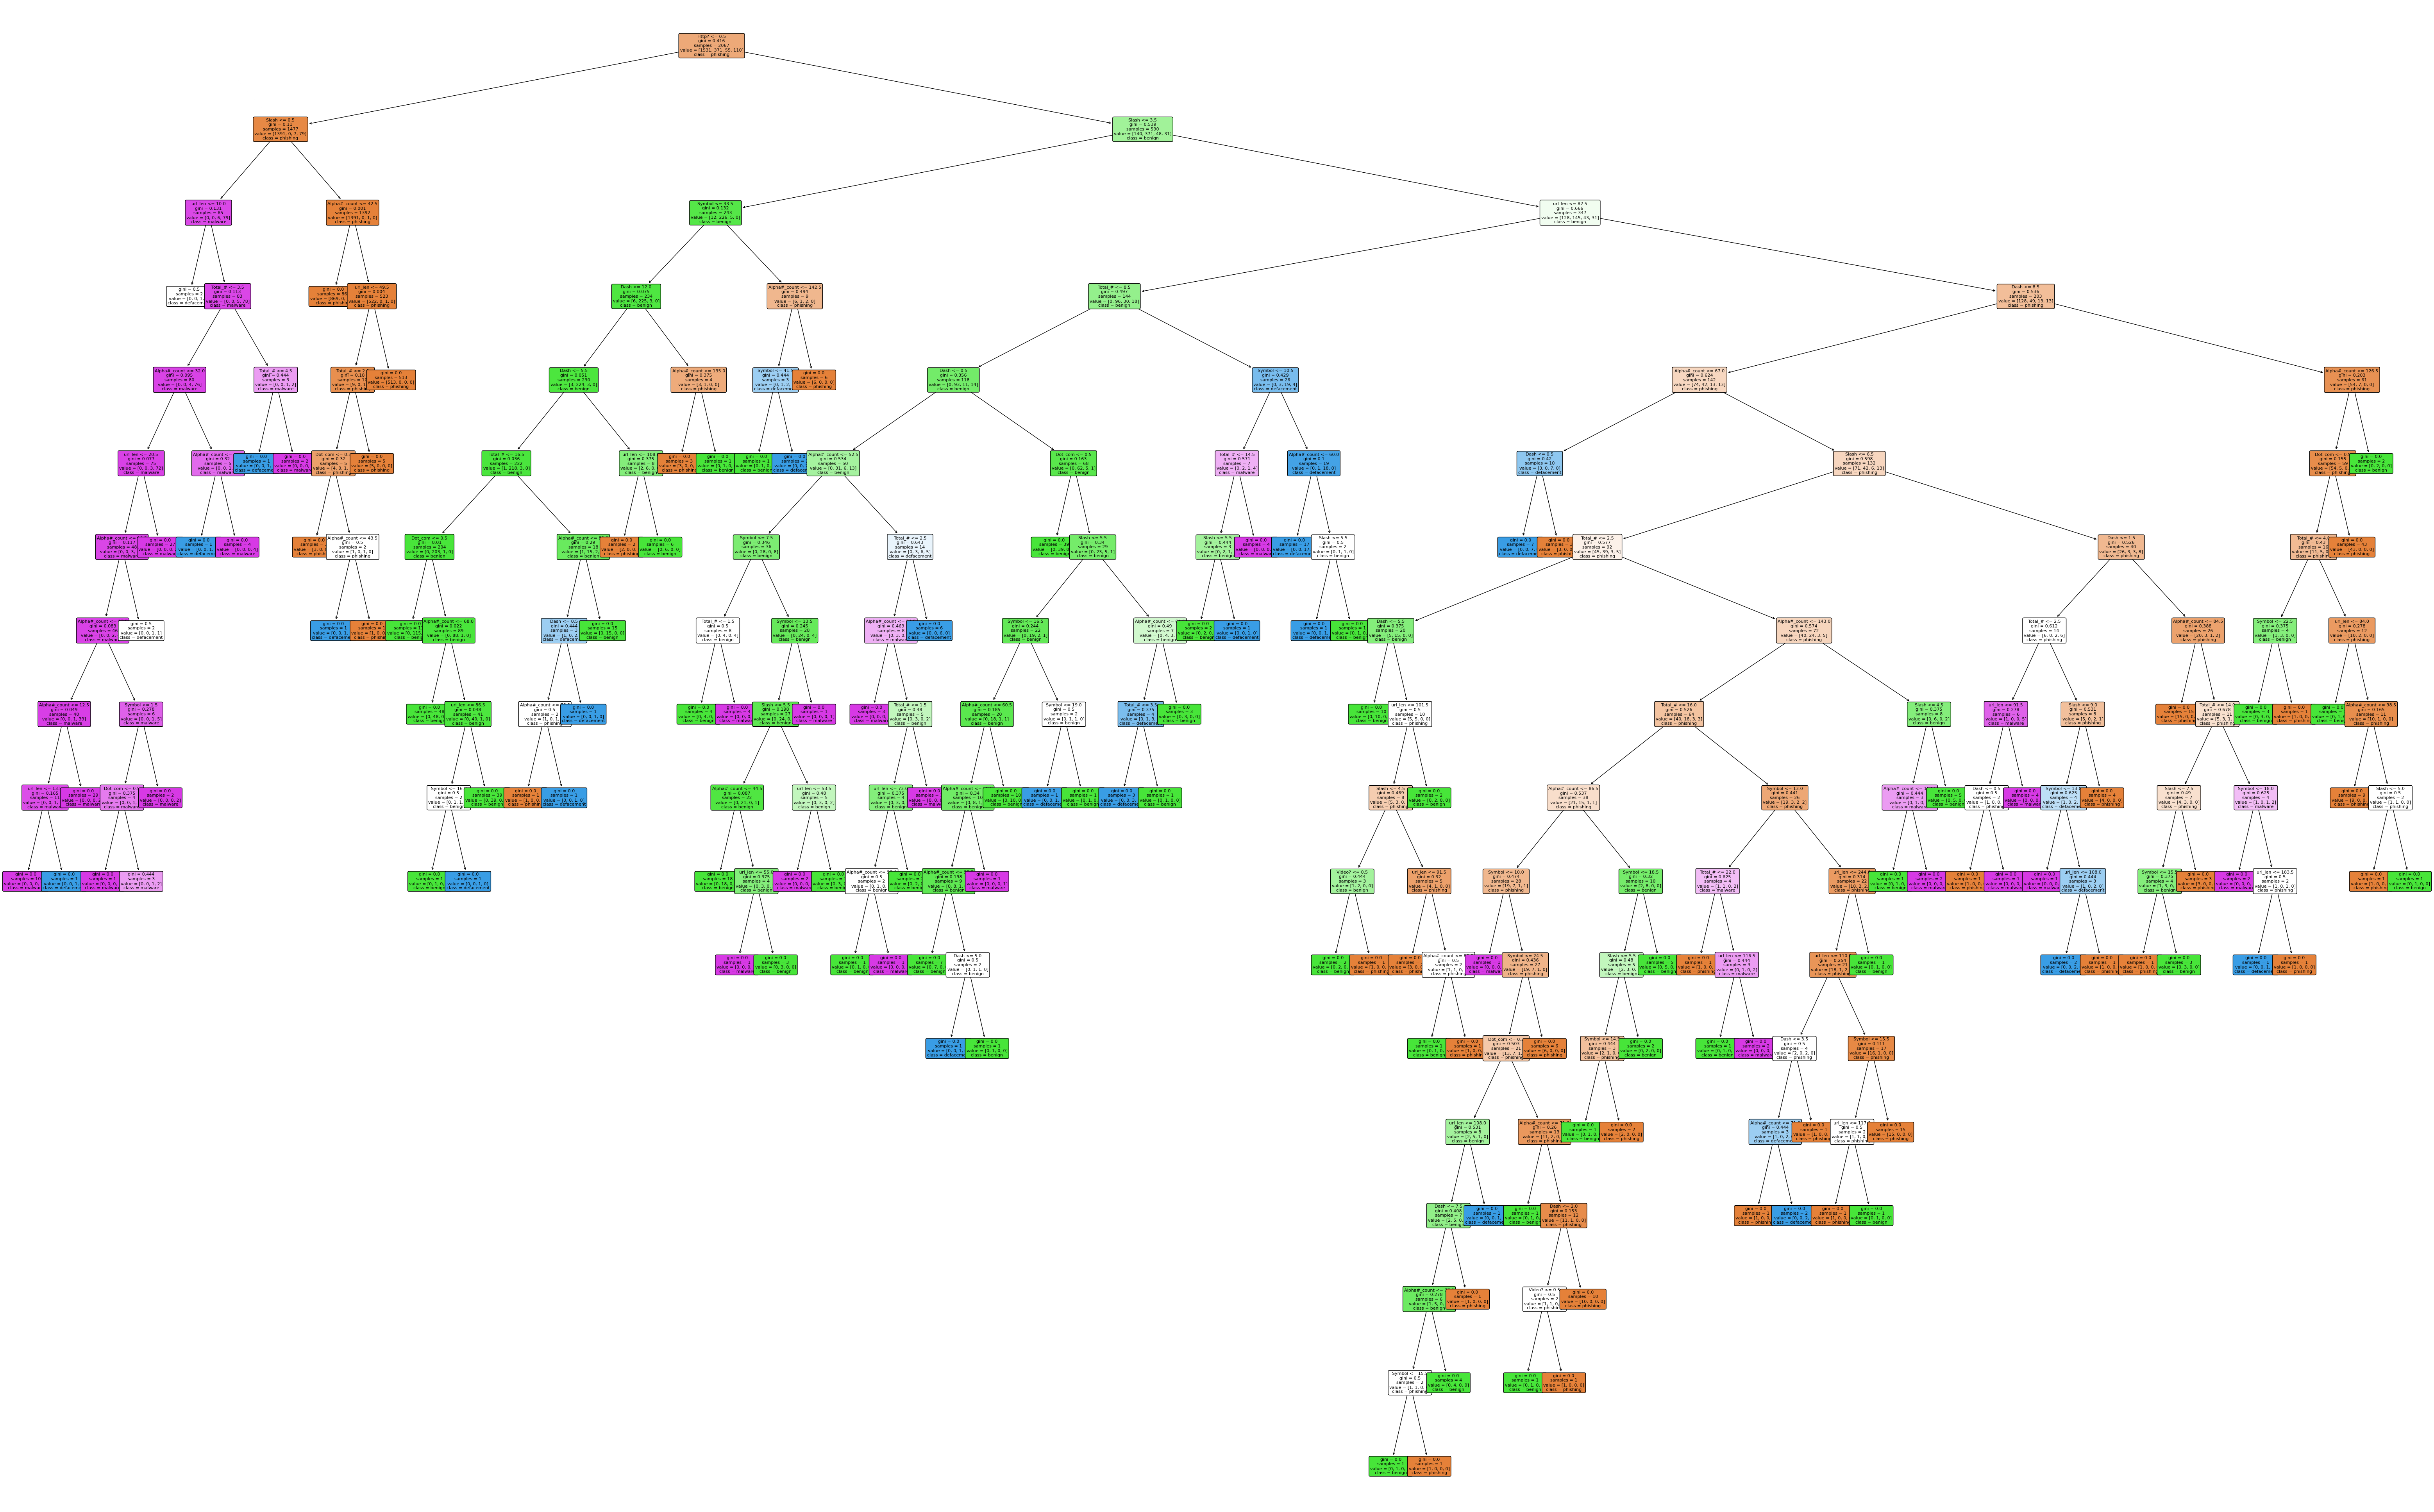

In [79]:
fig = plt.figure(figsize = (80, 50))
tree_plot = tree.plot_tree(dt_mod, feature_names = tree_feature, class_names=tree_class_name, 
                           filled=True, rounded=True, fontsize=8)

### Conclusion

The decision tree algorithm is best for the classification model of this dataset as its accuracy as well as its f1 scores appear to be best among the other algorithms. The next preferrable one is the logistics regression algorithm with an accuracy of 0.91 and f1 scores of 0.96, 0.89, 0.52 and 0.25 for benign, defacement, malware and phishing urls respectively. The logical regression algorithm is not good for predicting the phishing and malware urls.

Generally, i would say that the algorithms did not do a great job in predicting the malware and phishing urls as and this might be as a result of the small amount of the dataset(< 50) provided to the training model for these categories.